## CE9010 Project - Group 4
## Brain Tumour Detection
 Sun Yun Qian Priscila & Lau Zhe Ru Zachary
<hr>

## 1. Problem Description
<hr>

## 2. Data Acquisition
<hr>

__Instructions to use kaggle API to acquire dataset__
1. Create a kaggle account and create new API token. A <q>kaggle.json</q> file will be downloaded. 
2. Place the <q>kaggle.json</q> file under the directory: <q>C:\Users\YourUsername\\.kaggle</q> (Note: Replace <q>YourUsername</q> in the directory with your username).<br><br>

__Alternatively, you can download the dataset directly [here](https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection)__ (Note: Save the dataset in the same directory as this notebook).
<hr>

In [1]:
import kaggle

In [2]:
#list datasets in the brain category
!kaggle datasets list -s brain

ref                                                          title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
mateuszbuda/lgg-mri-segmentation                             Brain MRI segmentation                             714MB  2019-05-02 21:32:45           4360        129  0.8235294        
navoneel/brain-mri-images-for-brain-tumor-detection          Brain MRI Images for Brain Tumor Detection          15MB  2019-04-14 15:15:54           7737        157  0.5              
wanghaohan/confused-eeg                                      Confused student EEG brainwave data                109MB  2018-03-28 20:52:52           5261        236  0.7941176        
berkeley-biosense/synchronized-brainwave-dataset             Synchronized Brainw

In [3]:
#list files of a dataset
!kaggle datasets files navoneel/brain-mri-images-for-brain-tumor-detection

name           size  creationDate         
------------  -----  -------------------  
no/28 no.jpg    6KB  2019-04-14 15:15:52  
no/13 no.jpg    4KB  2019-04-14 15:15:52  
no/14 no.jpg    6KB  2019-04-14 15:15:52  
no/10 no.jpg    4KB  2019-04-14 15:15:52  
no/22 no.jpg    7KB  2019-04-14 15:15:52  
no/21 no.jpg    6KB  2019-04-14 15:15:52  
no/19 no.jpg    6KB  2019-04-14 15:15:52  
no/24 no.jpg    6KB  2019-04-14 15:15:52  
no/11 no.jpg    3KB  2019-04-14 15:15:52  
no/23 no.jpg    9KB  2019-04-14 15:15:52  
no/2 no.jpeg   78KB  2019-04-14 15:15:52  
no/1 no.jpeg   53KB  2019-04-14 15:15:52  
no/17 no.jpg    5KB  2019-04-14 15:15:52  
no/18 no.jpg    6KB  2019-04-14 15:15:52  
no/20 no.jpg    8KB  2019-04-14 15:15:52  
no/15 no.jpg    7KB  2019-04-14 15:15:52  
no/26 no.jpg    7KB  2019-04-14 15:15:52  
no/25 no.jpg    8KB  2019-04-14 15:15:52  
no/12 no.jpg    4KB  2019-04-14 15:15:52  
no/27 no.jpg    5KB  2019-04-14 15:15:52  
yes/Y111.JPG   25KB  2019-04-14 15:15:52  
yes/Y104.jp

In [4]:
#download dataset
!kaggle datasets download navoneel/brain-mri-images-for-brain-tumor-detection --unzip 


  0%|          | 0.00/15.1M [00:00<?, ?B/s]
  7%|6         | 1.00M/15.1M [00:00<00:02, 6.85MB/s]
 13%|#3        | 2.00M/15.1M [00:00<00:01, 7.64MB/s]
 26%|##6       | 4.00M/15.1M [00:00<00:01, 8.39MB/s]
 33%|###3      | 5.00M/15.1M [00:00<00:01, 8.84MB/s]
 40%|###9      | 6.00M/15.1M [00:00<00:01, 8.89MB/s]
 53%|#####2    | 8.00M/15.1M [00:00<00:00, 9.71MB/s]
 66%|######6   | 10.0M/15.1M [00:01<00:00, 10.4MB/s]
 79%|#######9  | 12.0M/15.1M [00:01<00:00, 10.8MB/s]
 93%|#########2| 14.0M/15.1M [00:01<00:00, 10.7MB/s]
100%|##########| 15.1M/15.1M [00:01<00:00, 10.8MB/s]


## Data Exploration & Pre-Processing
<hr>

In [5]:
import time
import random
import sklearn

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os #interact with file systems

import cv2 #pip install opencv-python (image functions)

In [6]:
yes=os.listdir('./brain_tumor_dataset/yes')#returns a list containing the names of the jpg file in the directory
no=os.listdir('./brain_tumor_dataset/no')
print(yes[1])

Y10.jpg


[[[3 3 3]
  [3 3 3]
  [3 3 3]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[3 3 3]
  [3 3 3]
  [3 3 3]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[3 3 3]
  [3 3 3]
  [3 3 3]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 ...

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [3 3 3]
  [3 3 3]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [1 1 1]
  [1 1 1]
  [2 2 2]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [1 1 1]
  [1 1 1]
  [2 2 2]]]
image dimensions= (218, 180, 3)


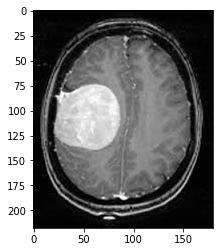

In [7]:
#show one raw training sample
img = cv2.imread('./brain_tumor_dataset/yes/'+yes[0])
#imread() decodes the image into a 3-dimensiomal matrix: (height,width,colour channels)
print(img)
print("image dimensions=",img.shape)
#Height of the raw image is 218 pixels, width is 180 pixels and there are 3 colour channels in the array(Blue, Green and Red)
from matplotlib import pyplot as plt
plt.imshow(img, interpolation='nearest')
plt.show()

In [8]:
#resize all image to the same size (224,224) and place them in lists
X=[]
for file in yes:
    img = cv2.imread('./brain_tumor_dataset/yes/'+file)
    img = cv2.resize(img, (224, 224) )#Height of image is 224 pixels, width is 224 pixels and there are 3 colour channels in the array (Blue,green,red)   
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#convert image to grey scale image
    X.append(img)

for file in no:
    img = cv2.imread('./brain_tumor_dataset/no/'+file)
    img = cv2.resize(img, (224, 224) )
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    X.append(img)


image dimensions= (224, 224)


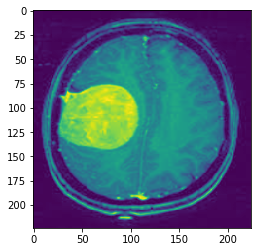

In [9]:
print("image dimensions=",X[0].shape)#an image has height 224, width 224 and there is only 1 dimension for grey scale values
plt.imshow(X[0], interpolation='nearest')

In [10]:
X = np.asarray(X)#convert the list of image matrices to an array
print('Shape of matrix with image stored as matrices(224x224) =',X.shape)

# number of data
n = X.shape[0] 
print('Number of training data=',n)

Shape of matrix with image stored as matrices(224x224) = (253, 224, 224)
Number of training data= 253


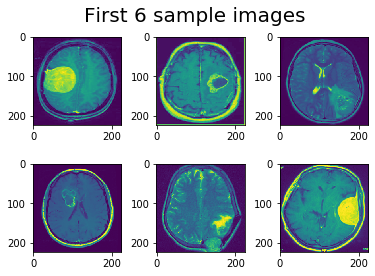

In [11]:
#Visualise
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def plot_images(X,start,end,r,c,title=None):
    """X is an array containing image arrays of size (224,224); r is row; c is column; 
    start is start index; end is end index;
    Output images arrange in grid rxc"""
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.4, wspace=0.4)#adjust spacing between plots
    for i in range(start+1, end+1):#visualise first 6 image
        ax = fig.add_subplot(r, c, i)
        ax.imshow(X[i-1], interpolation='nearest')
    fig.suptitle(title, fontsize=20)
        
plot_images(X,0,6,2,3,"First 6 sample images")


In [12]:
#normalize data
X = X.astype('float32')
X /= 255

In [13]:
#Create y-labels
yes_labels=np.full(len(yes),1)
no_labels=np.full(len(no),0)
y=np.concatenate([yes_labels,no_labels])
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
#split data: 70% train and 30% test
n=len(X)#total number of image
index = np.arange(0,n,1)
len_train = round(n*0.7)
len_test = n-len_train
print ("total number of data: ",n)
print ("number of train data :",len_train,"number of test data :",len_test)

total number of data:  253
number of train data : 177 number of test data : 76


Shape of matrix with image stored as flattened arrays in rows = (253, 50176)


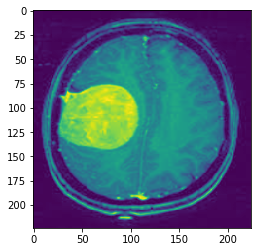

In [15]:
# create matrix with image stored as flattened arrays in rows
immatrix = np.array([X[i].flatten()
              for i in range(n)],'f')
#flatten() converts each image matrix (224,224) to a one-dimensional array of size 224*224=50176 features.
#because sklearn functions takes in training data, X, with shape (n_samples,n_features)

print('Shape of matrix with image stored as flattened arrays in rows =',immatrix.shape)
plt.imshow(immatrix[0].reshape(224,224), interpolation='nearest')#need to reshape flattened arrays to (224x224) to visualise image

In [16]:
#split flattened image data into training set and test set
from random import sample
X_train, X_test= [],[]
y_train, y_test= [],[]
test_index = sample(set(index), len_test)# Prints list of random index of given length len_test

for i in range(n):
    if i in test_index:
        X_test.append(immatrix[i])
        y_test.append(y[i])
    else:
        X_train.append(immatrix[i])
        y_train.append(y[i])

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)



In [17]:
#check shapes of train and test data

print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (177, 50176)
Shape of X_test: (76, 50176)
Shape of y_train: (177,)
Shape of y_test: (76,)


## PCA
<hr>

In [18]:
#PCA
from sklearn.decomposition import PCA
t = time.time()
pca = PCA(svd_solver='randomized')
X_train_pca = pca.fit_transform(X_train)
print ('Time: ',time.time()-t)

Time:  6.072204113006592


In [19]:
#Covariance
#Long run Time:  98.02181911468506
t = time.time()
print(pca.get_covariance().shape)
print('Time: ',time.time()-t)

(50176, 50176)
Time:  80.75267267227173


[0.0015676  0.00176025 0.00116577 ... 0.00285423 0.00302829 0.00304804]
(50176,)
total number of principal components= 177
(177, 224, 224)


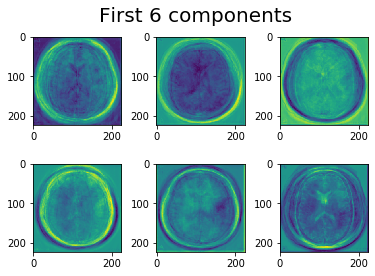

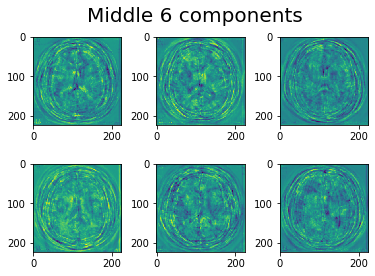

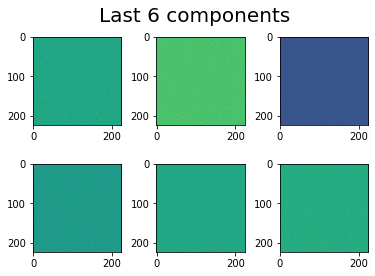

In [20]:
print(pca.components_[0])
print(pca.components_[0].shape)
n_pca=pca.components_[:].shape[0]
print("total number of principal components=",n_pca)
#plt.imshow(pca.components_[0].reshape(224,224), interpolation='nearest')


#create an array containing all principal components of size (224,224) because plot_images takes an array containing image matrices of size (224,224) as input
prin_comp=[]
for i in range(n_pca):
    prin_comp.append(pca.components_[i].reshape(224,224))
prin_comp=np.asarray(prin_comp)
print(prin_comp.shape)


plot_images(prin_comp[:6],0,6,2,3,"First 6 components")
plot_images(prin_comp[(int)(n_pca/2)-6:(int)(n_pca/2)],0,6,2,3,"Middle 6 components")
plot_images(prin_comp[n_pca-6:n_pca],0,6,2,3,"Last 6 components")

In [21]:
#variance
k = 0
var = 0
while var < 0.95 :
    var = var + pca.explained_variance_ratio_[k]
    k = k + 1
k -= 1

print('k=',k)
print('captured variance=',var)

k= 105
captured variance= 0.9513294022763148


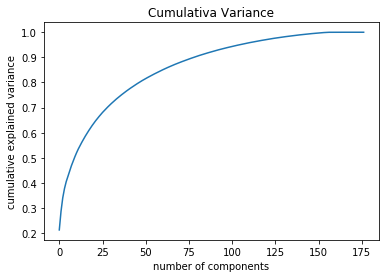

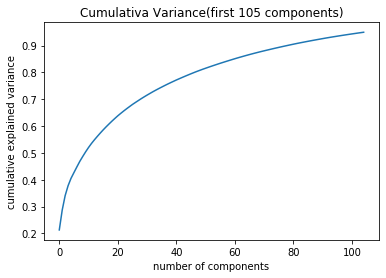

In [22]:
#Cumulative variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('Cumulativa Variance')
plt.show()
plt.plot(np.cumsum(pca.explained_variance_ratio_[:k]))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('Cumulativa Variance(first %i components)' %k)
plt.show()

In [23]:
#run PCA with k components
t = time.time()
pca = PCA(n_components = k, svd_solver='randomized')
X_train_pca = pca.fit_transform(X_train)#returns training data with shape (n_samples, n_components=k)
projected = pca.inverse_transform(X_train_pca)#transform training data with only first k principal components back to its original space, with shape (n_samples, n_features)
print('Time: ',time.time()-t)

Time:  1.6134240627288818


In [24]:
print(X_train_pca.shape)#reduced to k features
print(projected.shape)
print(X_train.shape)

(177, 105)
(177, 50176)
(177, 50176)


(177, 224, 224)
k= 105
(177, 224, 224)


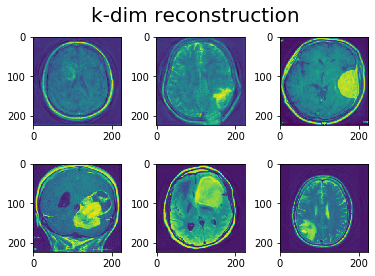

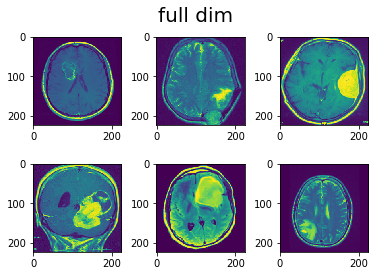

In [25]:
#Visualise the reconstructed sample images from only the first k principal components 

#create an array containing image matrices of size (224,224) because plot_images takes an array containing image matrices of size (224,224) as input
proj_img=[]
for i in range(len_train):#len_train=number of training data
    proj_img.append(projected[i].reshape(224,224))
proj_img=np.asarray(proj_img)
print(proj_img.shape)

#Show principle components
print("k=",k)
plot_images(proj_img[:6],0,6,2,3,"k-dim reconstruction")#plot first 6 sample images from training data (k-dimension)

#Visualise first 6 sample images from training data (full dimension)

#create an array containing image matrices of size (224,224) because plot_images takes an array containing image matrices of size (224,224) as input
X_train_img=[]
for i in range(len_train):#len_train=number of training data
    X_train_img.append(X_train[i].reshape(224,224))
X_train_img=np.asarray(X_train_img)
print(X_train_img.shape)

#Show first 6 sample images from training data (full dim)
plot_images(X_train_img[:6],0,6,2,3,"full dim")


## Unsupervised Classification - K-means
<hr>

### K-means Clustering with PCA

In [26]:
# Compute Accuracy
def compute_accuracy(y_pred,y):
    diff = (y_pred == y).astype('int')
    accuracy = sum(diff)/ y.shape[0]
    
    return accuracy

In [27]:
#if class labels are reversed
def reverse(y_kmeans):
    where_0 = np.where(y_kmeans == 0)
    where_1 = np.where(y_kmeans == 1)

    y_kmeans[where_0] = 1
    y_kmeans[where_1] = 0
    return y_kmeans
    
    

In [28]:
print('k=',k)
print('Shape of X_train_pca=',X_train_pca.shape)

k= 105
Shape of X_train_pca= (177, 105)


In [29]:
#K means Clustering
t = time.time()
from sklearn.cluster import KMeans
def kmeans_random(X_train_pca,k):
    L_iters= np.zeros(100)#record kmeans loss values
    #c_iters= np.zeros((100,2,k))#record 2 centroids, with k dimension each
    clust_iters= np.zeros((100,X_train_pca.shape[0]))#record clusters
    for i in range(100):#repeat kmeans algorithm 100 times with random initialisation
        kmeans = KMeans(n_clusters=2, init='random',n_init=1)#initialise random centroids 
        kmeans.fit(X_train_pca)#compute kmeans clustering
        y_kmeans_pca = kmeans.predict(X_train_pca)#compute kmeans prediction labels
        L_iters[i]=kmeans.inertia_/y_kmeans_pca.shape[0]#save current kmeans loss values
        #c_iters[i]=kmeans.cluster_centers_#save current centroids
        clust_iters[i]=y_kmeans_pca#save current clusters
        print('iter=',i+1,'; Kmeans loss=',L_iters[i])
    return L_iters, clust_iters
       
L_iters, clust_iters=kmeans_random(X_train_pca,k)#input X_train_pca with shape (177,k) 
print('Time: ',time.time()-t)

iter= 1 ; Kmeans loss= 1573.5297040328937
iter= 2 ; Kmeans loss= 1575.2334338172973
iter= 3 ; Kmeans loss= 1571.116558597435
iter= 4 ; Kmeans loss= 1575.4919370213865
iter= 5 ; Kmeans loss= 1575.4919370213865
iter= 6 ; Kmeans loss= 1573.5297040328937
iter= 7 ; Kmeans loss= 1576.2184778181327
iter= 8 ; Kmeans loss= 1576.2184778181327
iter= 9 ; Kmeans loss= 1570.9178418339256
iter= 10 ; Kmeans loss= 1570.8468912485496
iter= 11 ; Kmeans loss= 1575.4919370213865
iter= 12 ; Kmeans loss= 1573.7238791972832
iter= 13 ; Kmeans loss= 1576.2184778181327
iter= 14 ; Kmeans loss= 1575.426101042733
iter= 15 ; Kmeans loss= 1575.4919370213865
iter= 16 ; Kmeans loss= 1575.4919370213865
iter= 17 ; Kmeans loss= 1570.9178418339256
iter= 18 ; Kmeans loss= 1575.5140136904358
iter= 19 ; Kmeans loss= 1570.8468912485496
iter= 20 ; Kmeans loss= 1573.8974574184772
iter= 21 ; Kmeans loss= 1576.4570920514172
iter= 22 ; Kmeans loss= 1575.4919370213865
iter= 23 ; Kmeans loss= 1573.8996253190865
iter= 24 ; Kmeans loss

In [30]:
#find index of the minimum kmeans loss
L_iters=list(L_iters)#convert array L_iters to list so that we can use list functions as below
index=L_iters.index(min(L_iters))
print('min kmeans loss=',min(L_iters))
print('min index=',index)

min kmeans loss= 1570.8468912485496
min index= 9


In [31]:
#pick the solution with min kmeans loss value
y_kmeans_pca=clust_iters[index]
y_kmeans_pca=y_kmeans_pca.astype('int32')
print(y_kmeans_pca)

[0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0
 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0
 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


In [32]:
#kmeans is a form of unsupervised clustering. Therfore, class labels may be swapped during the clustering process.  
#If accuracy is less than 50%, it is likely that the labels are swapped.
if compute_accuracy(y_kmeans_pca,y_train)<0.5:
    y_kmeans_pca=reverse(y_kmeans_pca)

In [33]:
#kmeans prediction labels
print(y_kmeans_pca)

[0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0
 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0
 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


In [34]:
#actual labels
print(y_train)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [35]:
#compute accuracy
print('accuracy (with pca)=',compute_accuracy(y_kmeans_pca,y_train))

accuracy (with pca)= 0.6045197740112994


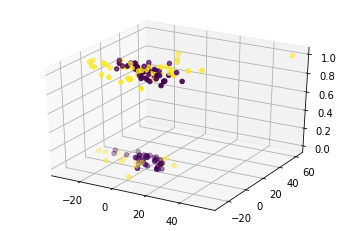

In [36]:
#3D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs =X_train_pca[:, 1] , ys =  X_train_pca[:,2], zs= y_train ,s=20, c=y_kmeans_pca, depthshade=True)

### K-means Clustering without PCA

In [37]:
print('Shape of X_train=',X_train.shape)

Shape of X_train= (177, 50176)


In [38]:
#K means clustering
#Note:long runtime (93 seconds) compared to with pca
t = time.time()
L_iters, clust_iters=kmeans_random(X_train,X_train.shape[1])
print('Time: ',time.time()-t)

iter= 1 ; Kmeans loss= 1668.8617754652405
iter= 2 ; Kmeans loss= 1671.7078196956625
iter= 3 ; Kmeans loss= 1670.7145342105696
iter= 4 ; Kmeans loss= 1668.9405465895013
iter= 5 ; Kmeans loss= 1668.8617754652405
iter= 6 ; Kmeans loss= 1668.8617754652405
iter= 7 ; Kmeans loss= 1673.458658555289
iter= 8 ; Kmeans loss= 1668.8617754652405
iter= 9 ; Kmeans loss= 1672.907509790277
iter= 10 ; Kmeans loss= 1671.7078196956625
iter= 11 ; Kmeans loss= 1673.458658555289
iter= 12 ; Kmeans loss= 1673.458658555289
iter= 13 ; Kmeans loss= 1674.1893429634076
iter= 14 ; Kmeans loss= 1673.458658555289
iter= 15 ; Kmeans loss= 1670.941693641849
iter= 16 ; Kmeans loss= 1673.4146332997473
iter= 17 ; Kmeans loss= 1672.1259679086697
iter= 18 ; Kmeans loss= 1668.8617754652405
iter= 19 ; Kmeans loss= 1671.8271454780831
iter= 20 ; Kmeans loss= 1671.7078196956625
iter= 21 ; Kmeans loss= 1668.8617754652405
iter= 22 ; Kmeans loss= 1673.458658555289
iter= 23 ; Kmeans loss= 1673.458658555289
iter= 24 ; Kmeans loss= 1671

In [39]:
#find index of the minimum kmeans loss
L_iters=list(L_iters)
index=L_iters.index(min(L_iters))
print('min kmeans loss=',min(L_iters))
print('min index=',index)

min kmeans loss= 1668.790220819844
min index= 80


In [40]:
#pick the solution with min kmeans loss value
y_kmeans=clust_iters[index]
y_kmeans=y_kmeans.astype('int32')
print(y_kmeans)

[0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0
 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0
 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


In [41]:
#kmeans is a form of unsupervised clustering. Therfore, class labels may be swapped during the clustering process.  
#If accuracy is less than 50%, it is likely that the labels are swapped.
if compute_accuracy(y_kmeans,y_train)<0.5:
    y_kmeans=reverse(y_kmeans)

In [42]:
#kmeans prediction labels
print(y_kmeans)

[0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0
 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0
 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


In [43]:
#actual labels
print(y_train)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [44]:
#compute accuracy
print('accuracy (no pca)=',compute_accuracy(y_kmeans,y_train))
#In general, applying PCA before building a model will NOT help to make the model perform better (in terms of accuracy)!
#This is because PCA is an algorithm that does not consider the response variable / prediction target into account. PCA will treat the feature has large variance as important features, but the feature has large variance can have noting to do with the prediction target.
#This means, you can produce a lot of useless features and eliminate useful features after PCA.
#Instead, The main benefit to PCA is reducing the size of your feature vectors for computational efficiency. 
#PCA is used to remove the least beneficial features so you have a smaller data set, but without losing too much predictive power.


accuracy (no pca)= 0.6045197740112994


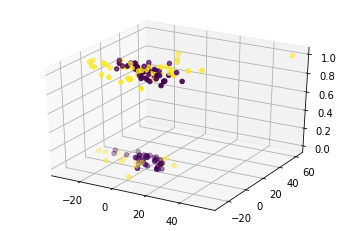

In [45]:
#3D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs =X_train_pca[:, 1] , ys =  X_train_pca[:,2], zs= y_train ,s=20, c=y_kmeans, depthshade=True)

### K-means ++ Clustering with PCA

In [46]:
print('k=',k)
print('Shape of X_train_pca=',X_train_pca.shape)

k= 105
Shape of X_train_pca= (177, 105)


In [47]:
#K means++ clustering
t = time.time()
from sklearn.cluster import KMeans
def kmeans_plus(X_train_pca,k):
    L_iters= np.zeros(100)#record kmeans loss values
    #c_iters= np.zeros((100,2,k))#record 2 centroids, with k dimension each
    clust_iters= np.zeros((100,X_train_pca.shape[0]))#record clusters
    for i in range(100):#repeat kmeans algorithm 100 times with random initialisation of first centroid
        kmeans = KMeans(n_clusters=2, init='k-means++',n_init=1)#initialise with kmeans++ 
        kmeans.fit(X_train_pca)#compute kmeans clustering
        y_kmeans_pca = kmeans.predict(X_train_pca)#compute kmeans prediction labels
        L_iters[i]=kmeans.inertia_/y_kmeans_pca.shape[0]#save current kmeans loss values
        #c_iters[i]=kmeans.cluster_centers_#save current centroids
        clust_iters[i]=y_kmeans_pca#save current clusters
        print('iter=',i+1,'; Kmeans loss=',L_iters[i])
    return L_iters, clust_iters
       
L_iters, clust_iters=kmeans_plus(X_train_pca,k)#input X_train_pca with shape (177,k) 
print('Time: ',time.time()-t)

iter= 1 ; Kmeans loss= 1575.4919370213865
iter= 2 ; Kmeans loss= 1573.5297040328937
iter= 3 ; Kmeans loss= 1574.0085373080294
iter= 4 ; Kmeans loss= 1575.4919370213865
iter= 5 ; Kmeans loss= 1575.7443518745836
iter= 6 ; Kmeans loss= 1575.4919370213865
iter= 7 ; Kmeans loss= 1570.9178418339256
iter= 8 ; Kmeans loss= 1570.9178418339256
iter= 9 ; Kmeans loss= 1570.9178418339256
iter= 10 ; Kmeans loss= 1575.4919370213865
iter= 11 ; Kmeans loss= 1570.8468912485496
iter= 12 ; Kmeans loss= 1570.9178418339256
iter= 13 ; Kmeans loss= 1570.9178418339256
iter= 14 ; Kmeans loss= 1575.4919370213865
iter= 15 ; Kmeans loss= 1575.4919370213865
iter= 16 ; Kmeans loss= 1575.4919370213865
iter= 17 ; Kmeans loss= 1573.217780688738
iter= 18 ; Kmeans loss= 1575.4919370213865
iter= 19 ; Kmeans loss= 1574.8213495035573
iter= 20 ; Kmeans loss= 1575.4919370213865
iter= 21 ; Kmeans loss= 1575.426101042733
iter= 22 ; Kmeans loss= 1575.4919370213865
iter= 23 ; Kmeans loss= 1571.116558597435
iter= 24 ; Kmeans loss=

In [48]:
#find index of the minimum kmeans loss
L_iters=list(L_iters)#convert array L_iters to list so that we can use list functions as below
index=L_iters.index(min(L_iters))
print('min kmeans loss=',min(L_iters))
print('min index=',index)

min kmeans loss= 1570.8468912485496
min index= 10


In [49]:
#pick the solution with min kmeans loss value
y_kmeans_pca=clust_iters[index]
y_kmeans_pca=y_kmeans_pca.astype('int32')
print(y_kmeans_pca)

[0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0
 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0
 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


In [50]:
#kmeans is a form of unsupervised clustering. Therfore, class labels may be swapped during the clustering process.  
#If accuracy is less than 50%, it is likely that the labels are swapped.
if compute_accuracy(y_kmeans_pca,y_train)<0.5:
    y_kmeans_pca=reverse(y_kmeans_pca)

In [51]:
#kmeans prediction labels
print(y_kmeans_pca)

[0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0
 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0
 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


In [52]:
#actual labels
print(y_train)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [53]:
#compute accuracy
print('accuracy (with pca)=',compute_accuracy(y_kmeans_pca,y_train))

accuracy (with pca)= 0.6045197740112994


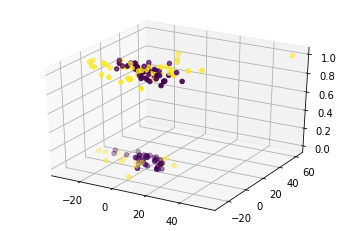

In [54]:
#3D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs =X_train_pca[:, 1] , ys =  X_train_pca[:,2], zs= y_train ,s=20, c=y_kmeans_pca, depthshade=True)

## Supervised classification - Logistic Regression
<hr>

In [55]:
#logistic regression----------------------------------------------------------------------------------------
#create X matrix
#linear predictive function

In [56]:
#PCA
from sklearn.decomposition import PCA
t = time.time()
pca = PCA(svd_solver='randomized')
X_test_pca = pca.fit_transform(X_test)
print ('Time: ',time.time()-t)

Time:  0.786400318145752


In [57]:
# run logistic regression with scikit-learn

from sklearn.linear_model import LogisticRegression
start = time.time()
logreg_sklearn = LogisticRegression(C=1e6) # scikit-learn logistic regression
logreg_sklearn.fit(X_train_pca, y_train) # learn the model parameters with k=101 principal components (X_train_pca=(n_samples, n_compenents) for training data)
print('Time=',time.time() - start)

Time= 0.03453707695007324


## Neural Networks?
<hr>

In [58]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.optimizers import Adam

from keras.applications.vgg16 import VGG16

#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

Using TensorFlow backend.
